In [1]:
from PIL import Image, ImageDraw
import glob
import os

In [ ]:
#            context.strokeRect(x0+dx*0.2, y0+dy*0.2, dx*0.6, dy*0.6);

In [17]:
left = 0.2
oben = 0.2
hoehe = 0.6
breite = 0.6

target_x = 20
target_y = 32


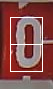

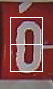

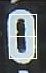

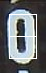

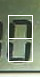

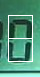

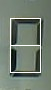

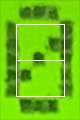

In [21]:
Input_dir='testimages'

files = glob.glob(Input_dir + '/*.jpg')

for aktfile in files:
#    print(aktfile)
    base = os.path.basename(aktfile)
    test_image = Image.open(aktfile)
#    print(test_image.size)
    
    shape = [(test_image.size[0] * left, test_image.size[1] * oben), (test_image.size[0] * (left + breite), test_image.size[1] * (oben + hoehe))]
    draw = ImageDraw.Draw(test_image)
    draw.rectangle(shape, outline ="white")
    draw.line((test_image.size[0] * left, test_image.size[1]*0.5) + (test_image.size[0] * (left+breite), test_image.size[1]*0.5))
    display(test_image)
    
    test_image = Image.open(aktfile)
    test_image = test_image.resize((target_x, target_y))
    shape = [(test_image.size[0] * left, test_image.size[1] * oben), (test_image.size[0] * (left + breite), test_image.size[1] * (oben + hoehe))]
    draw = ImageDraw.Draw(test_image)
    draw.rectangle(shape, outline ="white")
    draw.line((test_image.size[0] * left, test_image.size[1]*0.5) + (test_image.size[0] * (left+breite), test_image.size[1]*0.5))
    display(test_image)
    
#    test = input()
